In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
coordinates = list(lat_lngs)


In [3]:
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

67.50615895726801 -58.808762221590655
28.328272419765014 -77.67844919290084
86.58404089627459 -77.74236254248706
-43.00537619060035 -37.00539948907277
88.34616784881365 3.0946512159687813
-16.22860963808074 90.90080258651744
-62.725532980714334 78.76956589744879
-64.94358011913185 154.86172087883006
-76.14279560152552 162.48283264014964
63.49074302739726 30.62083362541921
82.49557941352333 20.80579795241286
65.80016426541346 -107.60853445782152
-86.60975602654452 -66.44989099511888
64.36566982271998 158.10014774606327
51.255543499569825 100.8348544206957
66.75605116230301 -98.39474919337525
33.01574247855686 -94.33474696714958
61.6939444543994 156.03749175332138
40.85973155909929 -36.24183058948145
-59.13253379854055 -115.80077849223315
-6.531790173919973 67.64941493473694
-34.05486993168508 -85.62307866820642
-78.14921123171436 105.15090108975505
44.07934213507963 -162.02342843891336
67.5974947722786 -87.15935625618253
66.00313359760108 58.98327382253481
3.086730341543941 142.24583955

41.13704427506639 -14.524436230068375
83.60934797974906 -56.819516181419615
59.280308546819924 42.70540493995125
76.54230229768689 32.01339959157332
41.72609322799261 -8.471622425892718
-41.75197718280573 8.764183547055865
-67.77296494701744 -126.89710189003725
-56.23644196511378 -166.10690147499892
-1.1198547247517325 136.79858547264092
-30.696861137384417 -15.490616898260981
-8.398494934496568 126.83667918226718
-17.4367010369116 30.55753116858031
15.367682255876161 -86.43048772377269
-56.83240408112102 100.3368419551943
49.48719646751286 69.82618802927044
-22.588070745866077 20.265641467026654
-52.937670148117995 95.28285526563593
51.38792920819435 167.0502536102142
-55.0294501798454 94.0966815210337
-84.52639605949301 40.109858048434035
70.19419699216664 151.24358602007294
28.157950406730208 -34.29855538560764
-56.699378579605586 10.160780530799883
89.93331448453873 -68.42732222638625
-25.37775231030713 -43.91426545779052
35.485503878016104 1.3758878663744838
82.50677599907851 -161

In [4]:
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sisimiut
Processing Record 2 of Set 1 | high rock
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 1 | bengkulu
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | lieksa
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | evensk
Processing Record 14 of Set 1 | kyren
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | marshall
Processing Record 17 of Set 1 | omsukchan
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | albany
Processing Record 

Processing Record 40 of Set 4 | pisco
Processing Record 41 of Set 4 | gandajika
Processing Record 42 of Set 4 | alta floresta
Processing Record 43 of Set 4 | srandakan
Processing Record 44 of Set 4 | porbandar
Processing Record 45 of Set 4 | aksu
Processing Record 46 of Set 4 | channel-port aux basques
Processing Record 47 of Set 4 | goderich
Processing Record 48 of Set 4 | port alfred
Processing Record 49 of Set 4 | ilhabela
Processing Record 50 of Set 4 | erdenet
Processing Record 1 of Set 5 | saint anthony
Processing Record 2 of Set 5 | pevek
Processing Record 3 of Set 5 | makinsk
Processing Record 4 of Set 5 | balkanabat
Processing Record 5 of Set 5 | ovsyanka
Processing Record 6 of Set 5 | taoudenni
Processing Record 7 of Set 5 | pacific grove
Processing Record 8 of Set 5 | sao joao da barra
Processing Record 9 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 10 of Set 5 | urumqi
Processing Record 11 of Set 5 | leningradskiy
Processing Record 12 of Set 5 | zlob

Processing Record 34 of Set 8 | bambous virieux
Processing Record 35 of Set 8 | esmeraldas
Processing Record 36 of Set 8 | los llanos de aridane
Processing Record 37 of Set 8 | yanan
City not found. Skipping...
Processing Record 38 of Set 8 | hovd
Processing Record 39 of Set 8 | nuevo ideal
Processing Record 40 of Set 8 | juan lacaze
Processing Record 41 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 42 of Set 8 | khorixas
Processing Record 43 of Set 8 | mount gambier
Processing Record 44 of Set 8 | zaozerne
Processing Record 45 of Set 8 | carhuamayo
Processing Record 46 of Set 8 | dharchula
Processing Record 47 of Set 8 | kalmunai
Processing Record 48 of Set 8 | acari
Processing Record 49 of Set 8 | yaan
Processing Record 50 of Set 8 | bilma
Processing Record 1 of Set 9 | gopalpur
Processing Record 2 of Set 9 | port hedland
Processing Record 3 of Set 9 | petrovsk-zabaykalskiy
Processing Record 4 of Set 9 | watrous
Processing Record 5 of Set 9 | vila
Pr

Processing Record 19 of Set 12 | ewa beach
Processing Record 20 of Set 12 | caluquembe
Processing Record 21 of Set 12 | linjiang
Processing Record 22 of Set 12 | upington
Processing Record 23 of Set 12 | losevo
Processing Record 24 of Set 12 | saint-francois
Processing Record 25 of Set 12 | iquitos
Processing Record 26 of Set 12 | madimba
Processing Record 27 of Set 12 | swift current
Processing Record 28 of Set 12 | braganca
Processing Record 29 of Set 12 | sampang
Processing Record 30 of Set 12 | valdivia
Processing Record 31 of Set 12 | tucuma
Processing Record 32 of Set 12 | botucatu
Processing Record 33 of Set 12 | soe
Processing Record 34 of Set 12 | tomatlan
Processing Record 35 of Set 12 | shamary
Processing Record 36 of Set 12 | crateus
Processing Record 37 of Set 12 | katobu
Processing Record 38 of Set 12 | waitati
Processing Record 39 of Set 12 | abu samrah
Processing Record 40 of Set 12 | meadow lake
Processing Record 41 of Set 12 | zambrow
Processing Record 42 of Set 12 | 

In [9]:
len(city_data)

566

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sisimiut,66.9395,-53.6735,26.24,92,95,6.89,GL,2022-03-29 18:48:54
1,High Rock,26.6208,-78.2833,77.02,62,0,1.05,BS,2022-03-29 18:48:54
2,Qaanaaq,77.4840,-69.3632,15.19,90,100,2.04,GL,2022-03-29 18:48:55
3,Cidreira,-30.1811,-50.2056,76.17,71,0,12.95,BR,2022-03-29 18:48:55
4,Bengkulu,-3.8004,102.2655,75.76,84,100,4.72,ID,2022-03-29 18:48:56
5,Busselton,-33.6500,115.3333,66.31,79,100,15.23,AU,2022-03-29 18:48:56
6,Bluff,-46.6000,168.3333,54.48,90,8,6.29,NZ,2022-03-29 18:48:57
7,Lieksa,63.3167,30.0167,16.83,95,91,8.05,FI,2022-03-29 18:48:57
8,Longyearbyen,78.2186,15.6401,12.04,62,0,4.61,SJ,2022-03-29 18:48:58
9,Yellowknife,62.4560,-114.3525,17.42,79,75,6.91,CA,2022-03-29 18:48:58


In [14]:
# city_data_df_new = city_data_df.reindex(columns=['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Cloudiness', 'Wind Speed'])

city_data_df_new = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df_new

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sisimiut,GL,2022-03-29 18:48:54,66.9395,-53.6735,26.24,92,95,6.89
1,High Rock,BS,2022-03-29 18:48:54,26.6208,-78.2833,77.02,62,0,1.05
2,Qaanaaq,GL,2022-03-29 18:48:55,77.4840,-69.3632,15.19,90,100,2.04
3,Cidreira,BR,2022-03-29 18:48:55,-30.1811,-50.2056,76.17,71,0,12.95
4,Bengkulu,ID,2022-03-29 18:48:56,-3.8004,102.2655,75.76,84,100,4.72
...,...,...,...,...,...,...,...,...,...
561,Guayaquil,EC,2022-03-29 19:01:04,-2.1667,-79.9000,83.95,87,79,3.22
562,San Antero,CO,2022-03-29 19:05:37,9.3741,-75.7589,87.80,62,71,9.28
563,Itoman,JP,2022-03-29 19:05:38,26.1247,127.6694,71.98,92,75,16.11
564,Lasa,IT,2022-03-29 19:05:38,46.6166,10.7002,48.36,90,100,2.08


In [18]:
# Create the output file (CSV).
output_data_file = "weatherdata/cities.csv"
# Export the City_Data into a CSV.
city_data_df_new.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

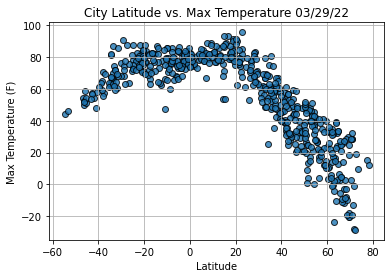

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weatherdata/Fig1.png")

# Show plot.
plt.show()

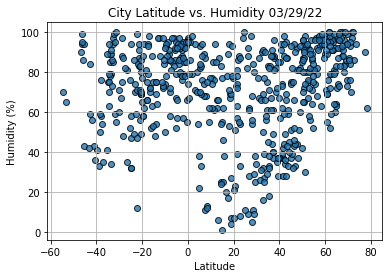

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weatherdata/Fig2.png")
# Show plot.
plt.show()

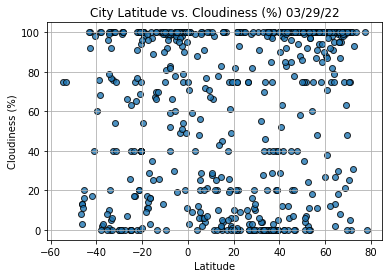

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weatherdata/Fig3.png")
# Show plot.
plt.show()

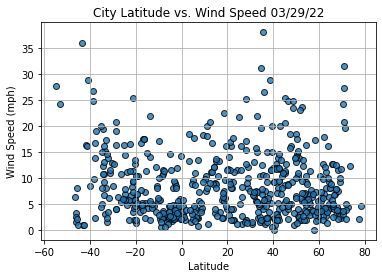

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weatherdata/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

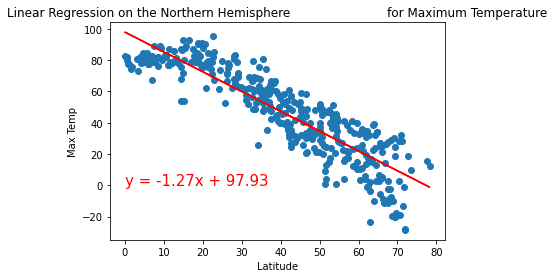

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',(0,0))

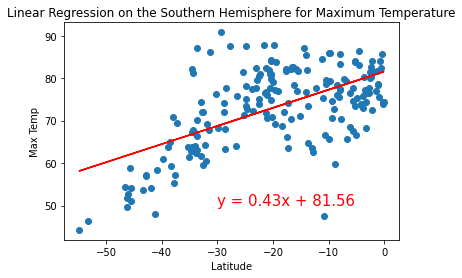

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp',(-30,50))

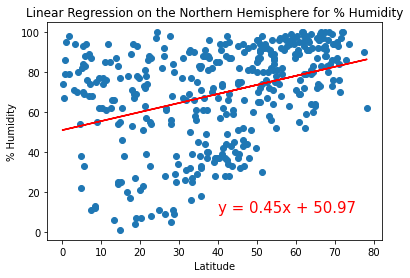

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity',(40,10))

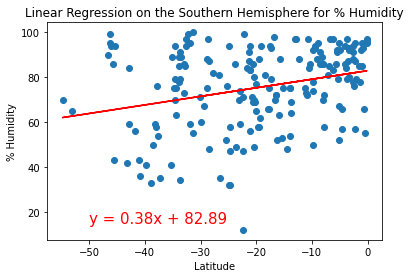

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-50,15))

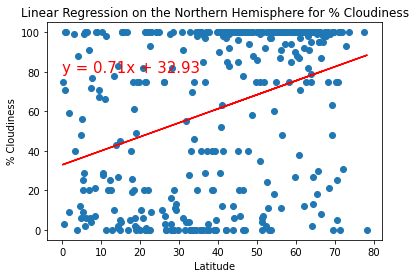

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(0,80))

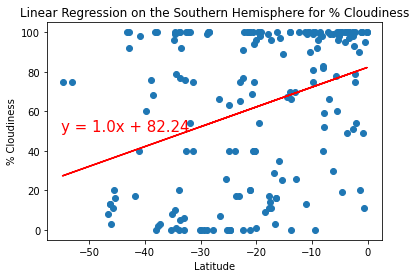

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-55,50))

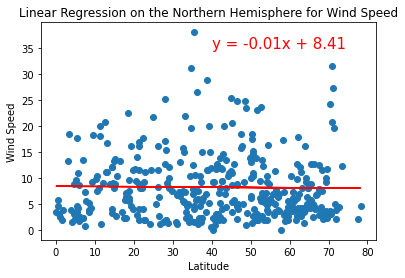

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(40,35))

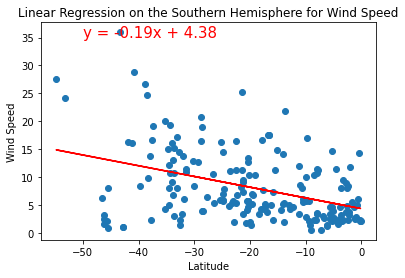

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed',
                       'Wind Speed',(-50,35))